***Importamos las librerias necesarias para el proyecto***

In [78]:
import missingno as msno
import pandas as pd
import numpy as np 
pd.options.display.float_format= '{:.10f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

***Abrimos los datasets***

In [79]:
data_train = pd.read_csv('properties_colombia_train.csv')
data_test = pd.read_csv('properties_colombia_test.csv')

***Utilizamos info() nos describe qué tipo de elemento es, cuántos registros tiene, si el data tiene nulos y cuántas filas - columnas ***

In [80]:
# vista general de los datos
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

In [81]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

***Hacemos un shape para saber cuantas filas y columnas tenemos en cada dataset***

In [82]:
data_train.shape

(197549, 27)

In [83]:
data_test.shape

(65850, 26)

***Utilizando la librería missingno podemos ver si hay valores nulos en la información a través de una visualización*** 

<AxesSubplot:>

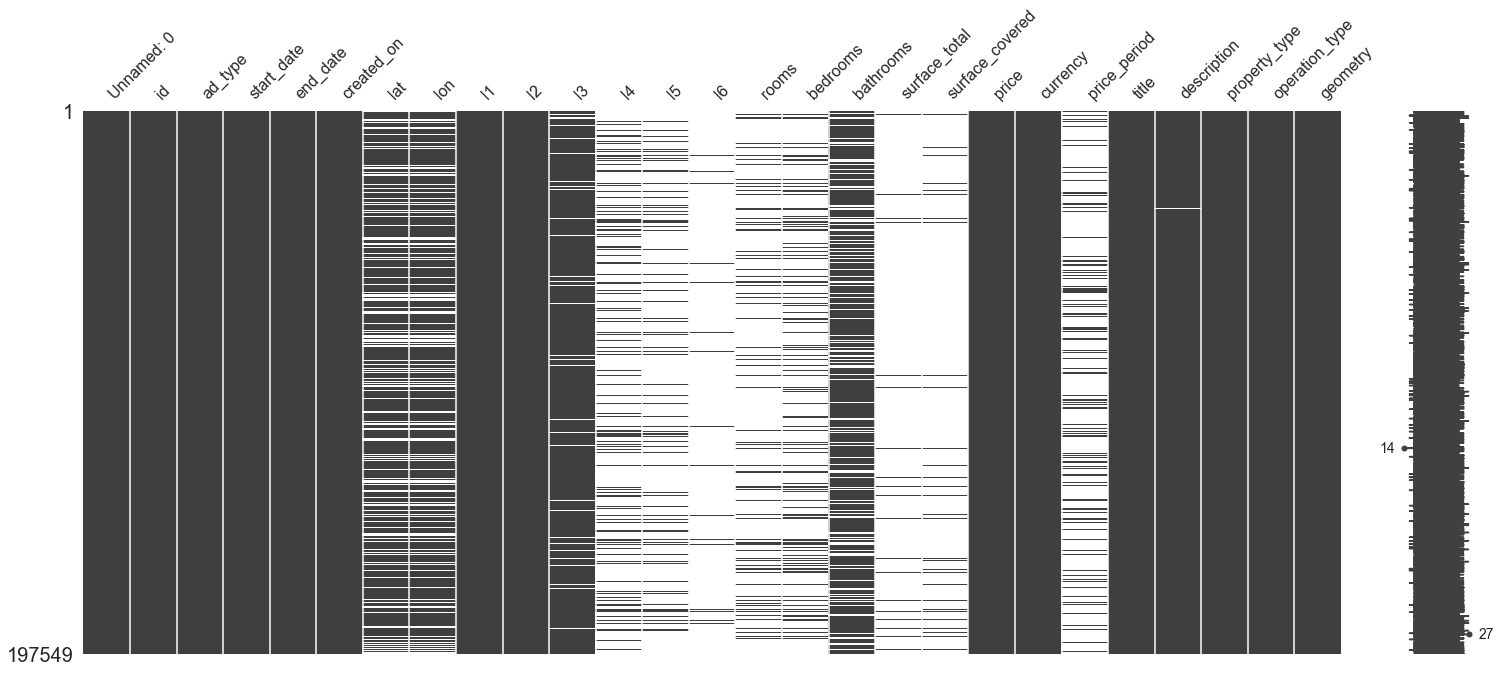

In [84]:
#podemos obsevar que de 27 columnas 14 son las que tienen los 197549 registros
msno.matrix(data_train)

<AxesSubplot:>

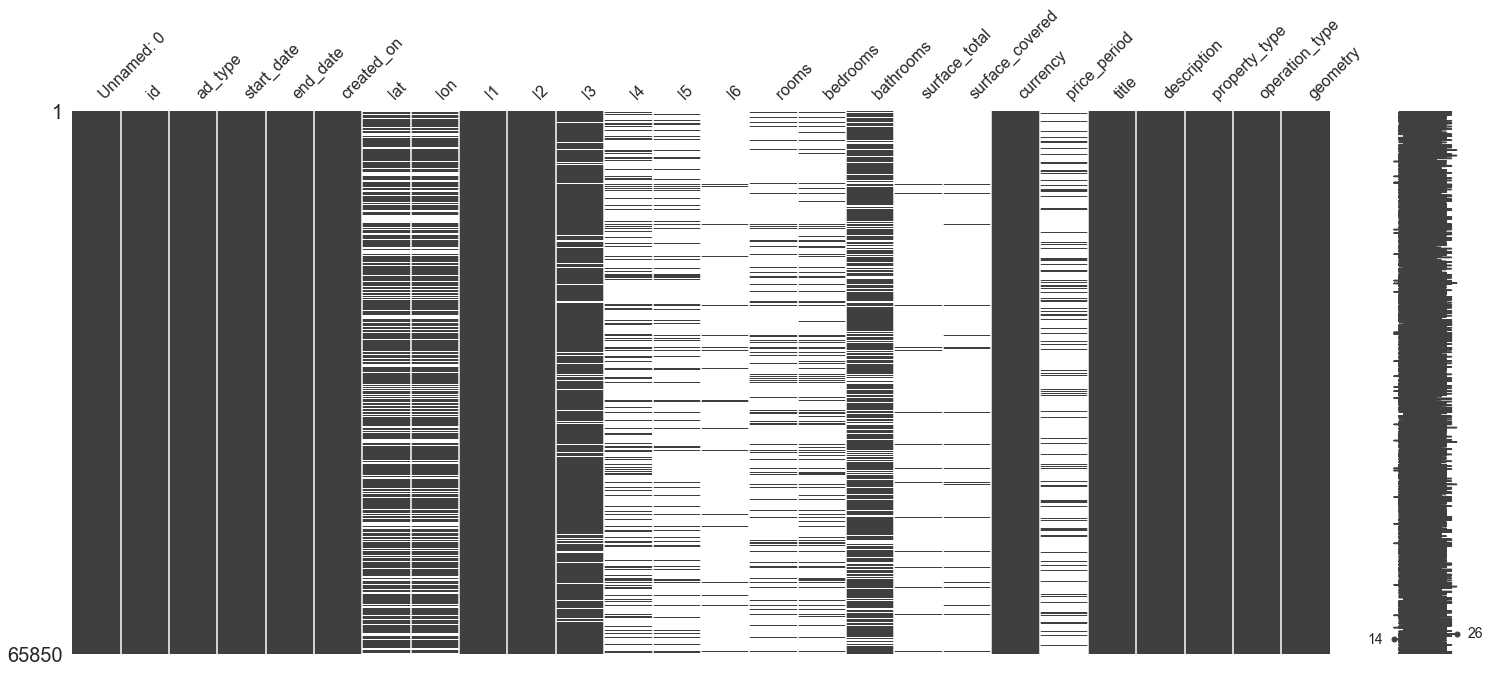

In [85]:
#podemos obsevar que de 26 columnas 14 son las que tienen los 65850 registros
msno.matrix(data_test)

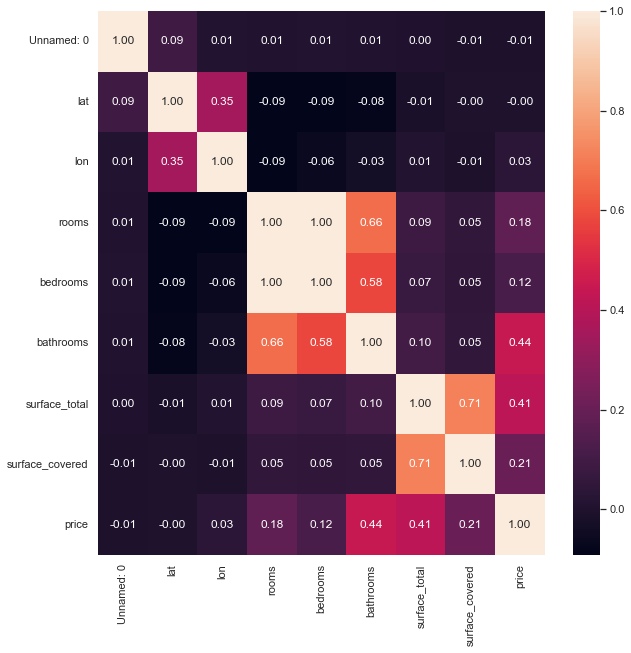

In [86]:
#grafico con los valores faltantes aun para ver que tan correlacionada estan
fig = plt.figure(figsize=(10,10))
sns.heatmap(data_train.corr(), cbar=True, annot=True, fmt='.2f')
plt.show()

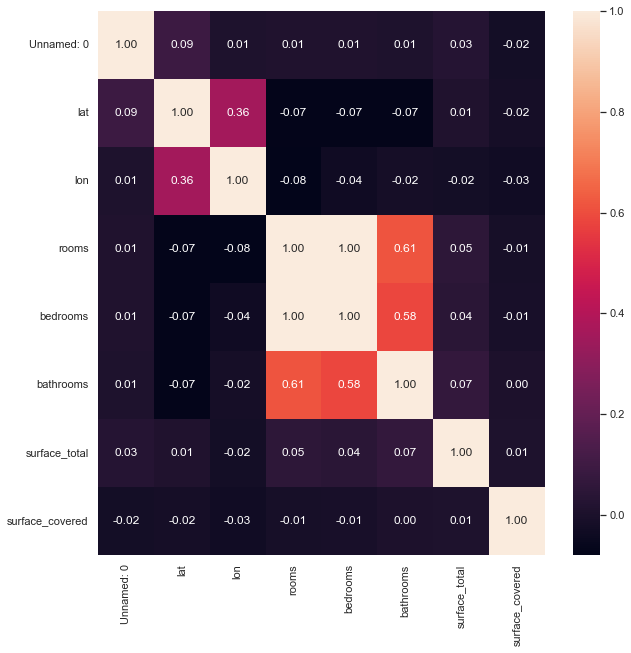

In [87]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data_test.corr(), cbar=True, annot=True, fmt='.2f')
plt.show()

***Realizo un analisis exploratorio de la columna precio y obtendremos algunas observaciones***

In [88]:
prices = data_train['price']

# Minimo precio de la datatrain
minimum_price = np.amin(prices)

# Maximo precio de la datatrain
maximum_price = np.amax(prices)

# Media (Promedio) precio de la datatrain
mean_price = np.mean(prices)

# Desviacion estandar precio de la datatrain
std_price = np.std(prices)

# Mostrando las estadisiticas calculadas
print("Estadísticas para el conjunto de datos de Colombia en cuanto al precio:\n")
print("Precio minimo: ${}".format(minimum_price)) 
print("Precio maximo: ${}".format(maximum_price))
print("Precio promedio: ${}".format(mean_price))
print("Desviación estándar de precios: ${}".format(std_price))

Estadísticas para el conjunto de datos de Colombia en cuanto al precio:

Precio minimo: $0.0
Precio maximo: $345000000000.0
Precio promedio: $643605091.0064613
Desviación estándar de precios: $1944862782.9184294


***Realizo la predicion de categorizacion en una nueva columna de las propiedades entre 0 = baratas o 1 = caras***

In [89]:
#Se agrega la columna de categorizacion con el promedio de precio 
mean_price = int(data_train.price.mean())

data_train['Precio_categorico'] = data_train['price'].apply(lambda x: 1 if x > mean_price else 0)

In [90]:
data_train = data_train[['rooms','bedrooms', 'bathrooms', 'surface_covered', 'property_type','Precio_categorico']]
data_test = data_test[['rooms','bedrooms', 'bathrooms', 'surface_covered', 'property_type']]

***Revisamos las cantidades de valores faltantes que tiene cada columna***

In [91]:
data_train.isna().sum()

rooms                170012
bedrooms             157024
bathrooms             41082
surface_covered      187747
property_type             0
Precio_categorico         0
dtype: int64

In [92]:
data_test.isna().sum()

rooms              56740
bedrooms           52447
bathrooms          13796
surface_covered    62545
property_type          0
dtype: int64

***Llenando los valores faltantes***

In [93]:
#Se rellenan los valores faltantes con el promedio
data_train.fillna(np.mean(data_train), inplace=True)
data_test.fillna(np.mean(data_test), inplace=True)

C:\Users\kfln0\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\kfln0\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [94]:
#Verificando que no haya valores faltantes
data_train.isna().sum()

rooms                0
bedrooms             0
bathrooms            0
surface_covered      0
property_type        0
Precio_categorico    0
dtype: int64

In [95]:
data_test.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_covered    0
property_type      0
dtype: int64

In [96]:
#Haciendo un ciclo for para cada columna
for col in data_train.columns:
    if data_train[col].dtypes == 'object':
        data_train = data_train.fillna(data_train[col].value_counts().index[0])
        data_test = data_test.fillna(data_train[col].value_counts().index[0])

In [97]:
#Pasando las variables a categoricas
enco = OrdinalEncoder()
data_train[["property_type"]] = enco.fit_transform(data_train[["property_type"]])


In [98]:
enc = OrdinalEncoder()
data_test[["property_type"]] = enc.fit_transform(data_test[["property_type"]])


In [99]:
data_train.head()

,rooms,bedrooms,bathrooms,surface_covered,property_type,Precio_categorico
0,3.2912081926,4.0000000000,4.0000000000,948.3356457866,1.0000000000,1
1,3.2912081926,3.0000000000,2.0000000000,948.3356457866,0.0000000000,0
2,3.2912081926,3.2390623072,2.0000000000,948.3356457866,1.0000000000,0
3,3.2912081926,3.2390623072,1.0000000000,948.3356457866,6.0000000000,1
4,3.2912081926,3.2390623072,2.0000000000,948.3356457866,0.0000000000,0


<AxesSubplot:>

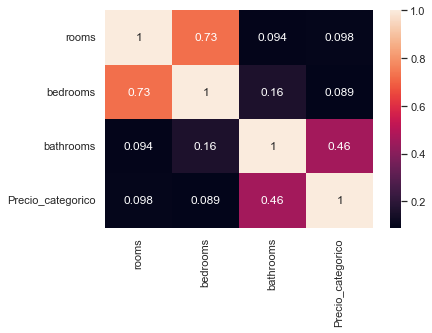

In [100]:
#Sacando la matriz de correlacion con los datasets limpios
numeric_cols = ['rooms', 'bedrooms', 'bathrooms', 'Precio_categorico']
cm = np.corrcoef(data_train[numeric_cols].values.T)
sns.set(font_scale = 1.0)
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

In [101]:
#Defino la variable X-y del data_train
X = data_train.drop(['Precio_categorico'],axis=1)
y = data_train.Precio_categorico

In [103]:
#Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [105]:
#Instancio el clasificador 
ran_f = RandomForestClassifier(n_estimators=1000, random_state=2)

In [106]:
#Entreno el modelo
ran_f.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=2)

In [107]:
#Haciendo la predicccion
y_pred = ran_f.predict(X_test)

In [109]:
# Se calcula la matriz de confusión
matriz = confusion_matrix(y_test,y_pred)
matriz

array([[42941,  2308],
       [ 8060,  5956]], dtype=int64)

In [111]:
# Realizamos las predicciones correspondientes a nuesto dataset 'dataTest'
y_pred_test = ran_f.predict(data_test)

In [113]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print('recall:',recall)
print('accuracy:',accuracy)

recall: 0.4249429223744292
accuracy: 0.8250569476082005


In [118]:
# Exportamos el archivo
prediccion = pd.DataFrame(y_pred, columns = ['pred'])

In [119]:
prediccion.to_csv('Karenuzca.csv', index = False)